In [6]:
import pandas as pd
df = pd.read_csv("sleeping-alone-data.csv")
print(df.shape)
print(df.columns)

(1094, 31)
Index([u'StartDate', u'EndDate',
       u'Which of the following best describes your current relationship status?',
       u'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       u'When both you and your partner are at home, how often do you sleep in separate beds?',
       u'When you're not sleeping in the same bed as your partner, where do you typically sleep?',
       u'Unnamed: 6',
       u'When you're not sleeping in the same bed, where does your partner typically sleep?',
       u'Unnamed: 8',
       u'What are the reasons that you sleep in separate beds? Please select all that apply.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14', u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17',
       u'Unnamed: 18', u'Unnamed: 19',
       u'When was the first time you slept in separate beds?',
       u'To what extent do you agree with 

In [8]:
pd.set_option("display.max_columns", df.shape[0])
df.head(3)

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,When was the first time you slept in separate beds?,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:�_""our sex life has improved as a result of sleeping in separate beds.""�_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,We are no longer physically intimate,We have different temperature preferences for ...,We've had an argument or fight,Not enough space,Do not want to share the covers,One of us needs to sleep with a child,Night working/very different sleeping times,Other (please specify),Response,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Within the first 1-5 years of our relationship,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,Immediately/ We've always slept in separate beds,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic


In [20]:
# How many different answers to "How often do you sleep alone"
df.ix[:,4].nunique()

7

In [18]:
# What is the distribution of responses by categories eg gender?
sleep_alone = df.ix[:,4].name
g1 = df.groupby(["Gender",sleep_alone])
g1.size()

Gender    When both you and your partner are at home, how often do you sleep in separate beds?
Female    A few times per month                                                                    25
          A few times per week                                                                     25
          Every night                                                                              65
          Never                                                                                   258
          Once a month or less                                                                     49
          Once a year or less                                                                      66
Male      A few times per month                                                                    33
          A few times per week                                                                     19
          Every night                                                                    

In [27]:
df.groupby("Age").size()

Age
18-29       122
30-44       288
45-60       312
> 60        283
Response      1
dtype: int64

In [29]:
df.groupby("Household Income").size()

Household Income
$0 - $24,999            45
$100,000 - $149,999    226
$150,000+              126
$25,000 - $49,999       99
$50,000 - $99,999      314
Response                 1
dtype: int64

In [49]:
df.groupby(["Age","Household Income"]).size()

Age       Household Income   
18-29     $0 - $24,999            18
          $100,000 - $149,999     14
          $150,000+                5
          $25,000 - $49,999       22
          $50,000 - $99,999       41
30-44     $0 - $24,999            11
          $100,000 - $149,999     55
          $150,000+               32
          $25,000 - $49,999       32
          $50,000 - $99,999      114
45-60     $0 - $24,999            11
          $100,000 - $149,999     87
          $150,000+               52
          $25,000 - $49,999       22
          $50,000 - $99,999       79
> 60      $0 - $24,999             5
          $100,000 - $149,999     70
          $150,000+               37
          $25,000 - $49,999       23
          $50,000 - $99,999       80
Response  Response                 1
dtype: int64

In [36]:
g2 = df.groupby([sleep_alone,'Age'])
g2.size()

When both you and your partner are at home, how often do you sleep in separate beds?  Age     
A few times per month                                                                 18-29         4
                                                                                      30-44        23
                                                                                      45-60        19
                                                                                      > 60         12
A few times per week                                                                  18-29         2
                                                                                      30-44        21
                                                                                      45-60        12
                                                                                      > 60          9
Every night                                                                           18-

In [44]:
sum(df['Age'].isnull())

88

In [52]:
df= df.dropna(subset=['Age'])
df.shape

(1006, 31)

In [58]:
100 * df.groupby([sleep_alone,'Age'])['Age'].count() / df['Age'].count()

When both you and your partner are at home, how often do you sleep in separate beds?  Age     
A few times per month                                                                 18-29        0.397614
                                                                                      30-44        2.286282
                                                                                      45-60        1.888668
                                                                                      > 60         1.192843
A few times per week                                                                  18-29        0.198807
                                                                                      30-44        2.087475
                                                                                      45-60        1.192843
                                                                                      > 60         0.894632
Every night                              

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

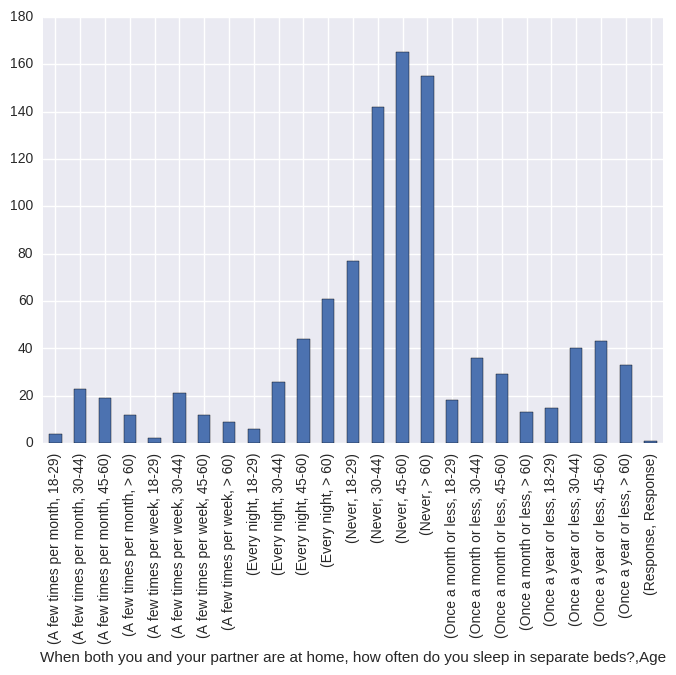

In [89]:
s= df.groupby([sleep_alone,'Age'])['Age'].count()
s.plot.bar(stacked=True)
plt.show()